# Importing Required Libraries:-

In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

from scipy import stats
from scipy.stats import norm,skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor


# for warnings
import warnings
warnings.filterwarnings('ignore')

# Load Train and Test Data:-

In [393]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Remove unnecessary column from the dataset.

df_train.drop('Id',axis=1,inplace=True)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [394]:
df_test.drop('Id',axis=1,inplace=True)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [395]:
print(df_train.shape)
print(df_test.shape)

(1460, 80)
(1459, 79)


# Missing Values:-

> **Train Data:-**

In [396]:
missing_percentage = (df_train.isnull().sum()/len(df_train))*100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending = False)
missing_percentage

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

**As there are not many informations availabel in the top4 columns of missing % so we can drop it.**

In [397]:
df_train.drop(['PoolQC','MiscFeature','Alley','Fence','3SsnPorch'],axis=1,inplace=True)

> **Test Data:-**

In [398]:
missing_percentage_test = (df_test.isnull().sum()/len(df_test))*100
missing_percentage_test = missing_percentage_test[missing_percentage_test > 0].sort_values(ascending = False)
missing_percentage_test

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
dtype: float64

**Same for Test as well, we can drop top4 columns as they have more NaN values.**

In [399]:
df_test.drop(['PoolQC','MiscFeature','Alley','Fence','3SsnPorch'],axis=1,inplace=True)

**Check the Skewness of the Features:-**

In [400]:
df_train.skew()

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
dtype: float64

**Let's first visualise the distribution of Target variable and if it is a skewed then we can change it by taking log transformation of it**

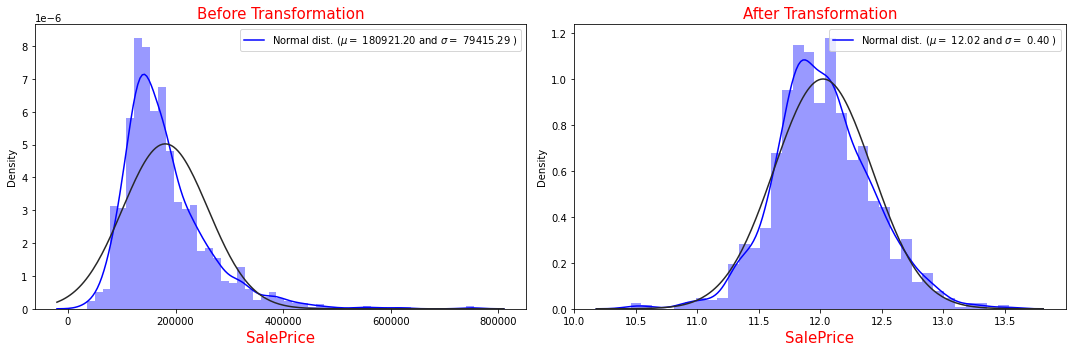

In [401]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
fig1 = sns.distplot(df_train['SalePrice'],color = 'b',fit=norm)
(mu, sigma) = norm.fit(df_train['SalePrice'])
plt.title("Before Transformation",color = 'r',size=15)
plt.xlabel("SalePrice",size=15,color='r')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])

plt.subplot(1,2,2)
target = np.log(df_train['SalePrice'])
fig2 = sns.distplot(target,color = 'b',fit=norm,label = "After Transformation")
(mu, sigma) = norm.fit(target)
plt.title("After Transformation",color = 'r',size=15)
plt.xlabel("SalePrice",size=15,color='r')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])

plt.tight_layout()
plt.show()


# fig = plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.distplot(df_train['SalePrice'] , fit=norm);
# (mu, sigma) = norm.fit(df_train['SalePrice'])

# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')

# plt.subplot(1,2,2)
# res = stats.probplot(df_train['SalePrice'], plot = plt)
# plt.suptitle('Before transformation')


# # Apply transformation
# df_train['SalePrice'] = np.log(df_train['SalePrice'])
# # # New prediction
# # y_train = df_train['SalePrice'].values
# # y_train_orig = df_train['SalePrice']


# # Plot histogram and probability after transformation
# fig = plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.distplot(df_train['SalePrice'] , fit=norm);
# (mu, sigma) = norm.fit(df_train['SalePrice'])

# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')
# plt.subplot(1,2,2)
# res = stats.probplot(df_train['SalePrice'], plot=plt)
# plt.suptitle('After transformation')
# plt.show()

**we can divide the features into numerical and category features to make a good analysis.**

In [402]:
num_feat = list(col for col in df_train.columns if df_train[col].dtypes != 'O')
print('Numerical Features are: {}'.format(len(num_feat)))

cat_feat = list(col for col in df_train.columns if df_train[col].dtypes == 'O')
print('Categorical Features are: {}'.format(len(cat_feat)))

Numerical Features are: 36
Categorical Features are: 39


# Correlations of Features:-

<AxesSubplot:>

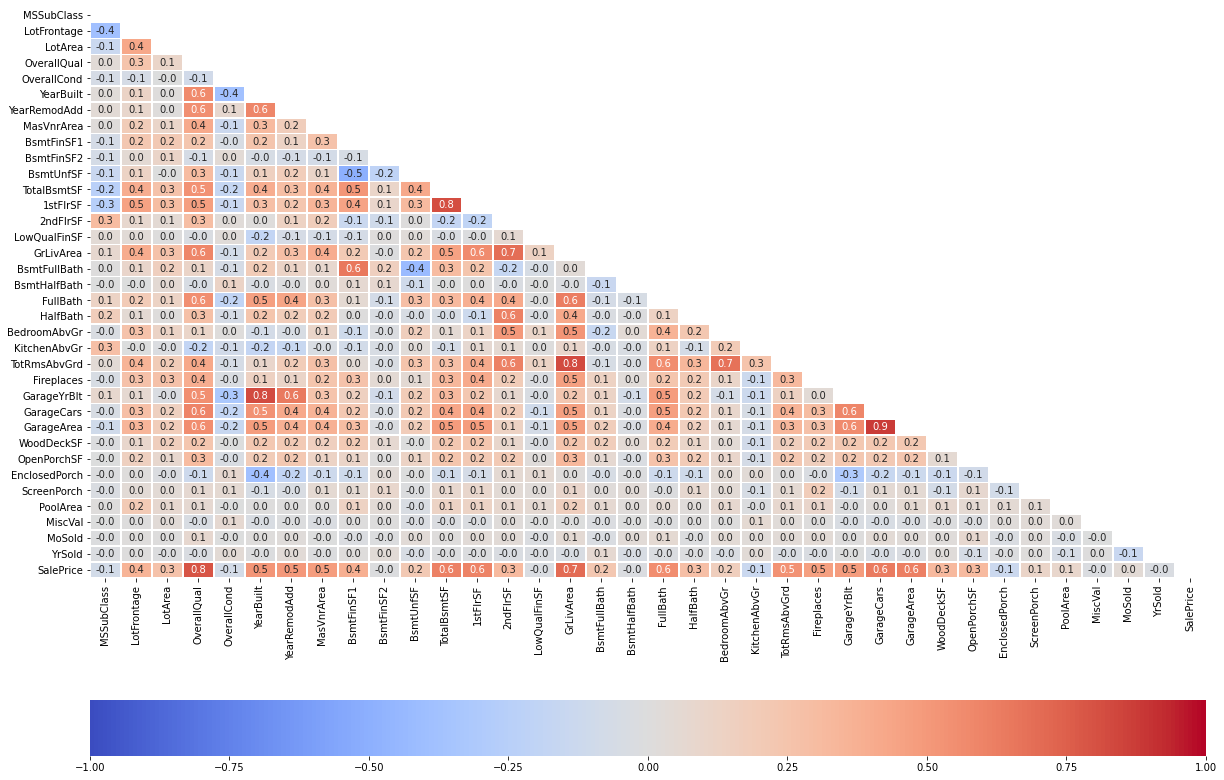

In [403]:
plt.figure(figsize=[20,15])
corr = df_train[num_feat].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='coolwarm',mask = mask,linewidths=0.4,fmt='.1f',vmin=-1,vmax=1,center=0,
            cbar_kws={'orientation':'horizontal'})

In [404]:
df_train[num_feat].corr()['SalePrice'].sort_values(ascending=False).nlargest(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

# EDA:-

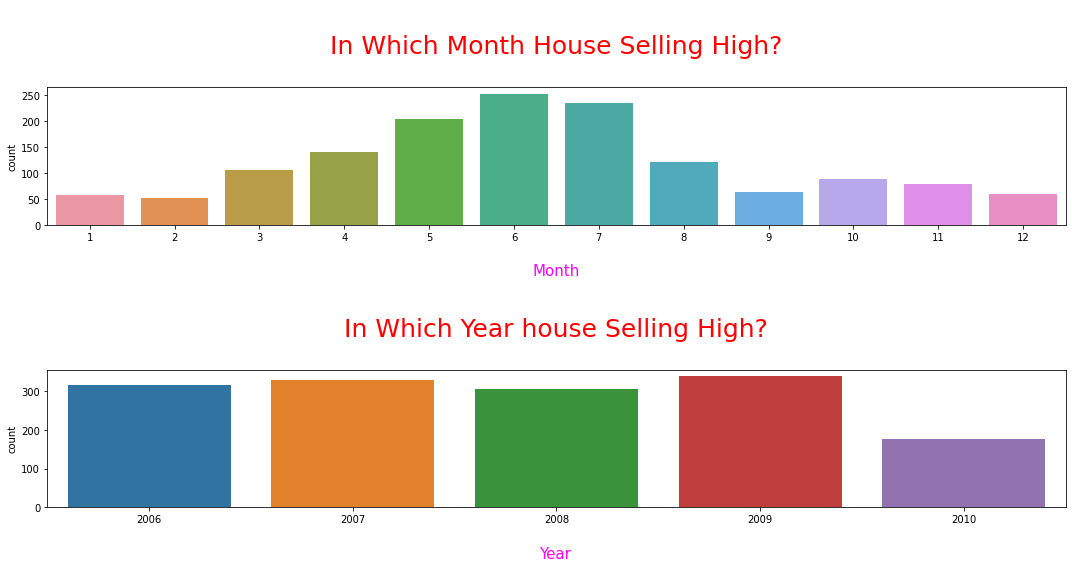

In [405]:
plt.figure(figsize=[15,8])
plt.subplot(2,1,1)
fig = sns.countplot(df_train['MoSold'])
plt.title("\nIn Which Month House Selling High?\n",color='r',size=25)
plt.xlabel("\nMonth",color='magenta',size=15)
plt.subplot(2,1,2)
fig1 = sns.countplot(df_train['YrSold'])
plt.title("\nIn Which Year house Selling High?\n",color='r',size=25)
plt.xlabel("\nYear",color='magenta',size=15)
plt.tight_layout()
plt.show()

**From the above subplots, in month of June and July  of 2009 most of the houses were sold**

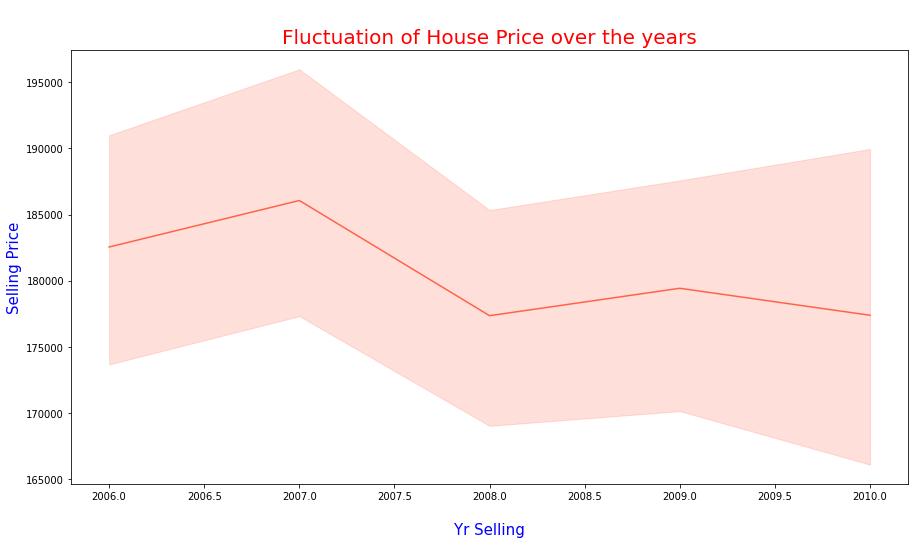

In [406]:
plt.figure(figsize = [15,8])
sns.lineplot(df_train['YrSold'],df_train['SalePrice'],color='tomato')
plt.title("\nFluctuation of House Price over the years",size = 20,color = 'red')
plt.xlabel('\nYr Selling',color='blue',size=15)
plt.ylabel('Selling Price',color='blue',size=15)
plt.show()

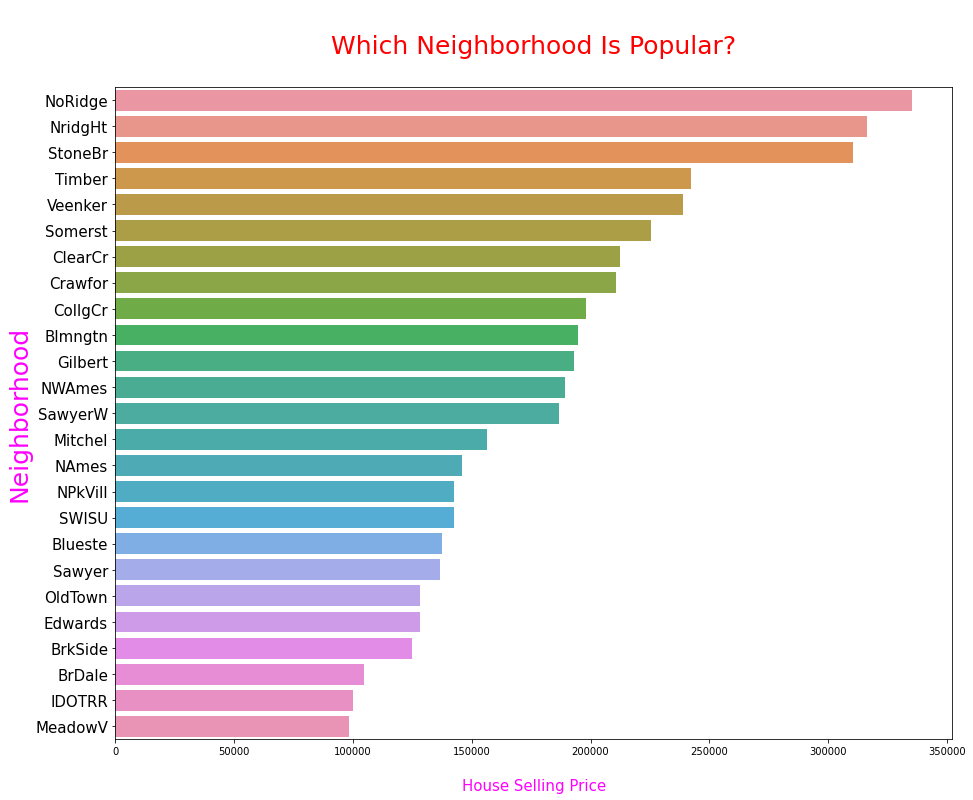

In [407]:
plt.figure(figsize=[15,12])
grp_order = df_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values(ascending=False).index
sns.barplot(y = df_train['Neighborhood'], x = df_train['SalePrice'],order = grp_order,ci=None,orient='h')
plt.title("\nWhich Neighborhood Is Popular?\n",size=25,color='r')
plt.xlabel("\nHouse Selling Price",color='magenta',size=15)
plt.ylabel("Neighborhood",color = 'magenta',size=25)
plt.yticks(fontsize=15)
plt.show()

**Distributions of Numerical Features:-**

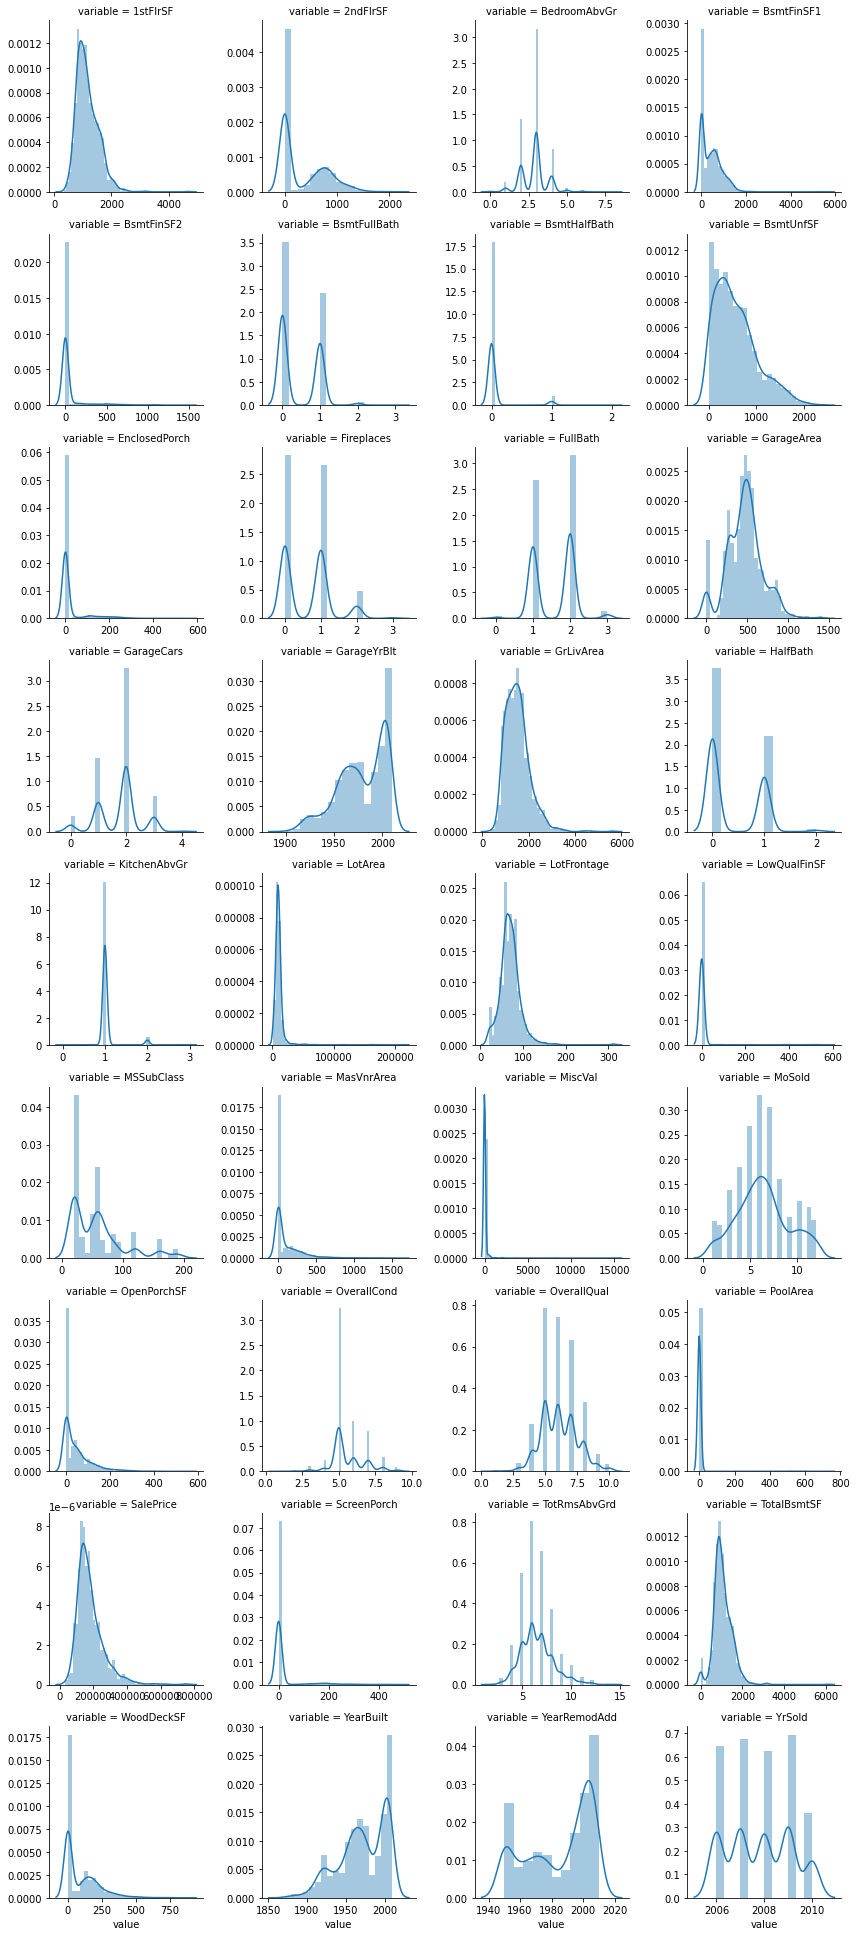

In [408]:
f = pd.melt(df_train, value_vars = sorted(num_feat))
g = sns.FacetGrid(f,col = 'variable',col_wrap=4,sharex=False,sharey=False)
g = g.map(sns.distplot,'value')

**So,from the above graphs we conclude that majority of the graphs have right and left skewed distributions.Also,we can see that some of the columns shows the categorical ditributions so we can changed them from numerical to category.**

In [409]:
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['OverallCond'] = df_train['OverallCond'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [410]:
cat_feat = list(col for col in df_train.columns if df_train[col].dtypes == 'O')
print('Categorical Features now becomes: {}'.format(len(cat_feat)))

Categorical Features now becomes: 43


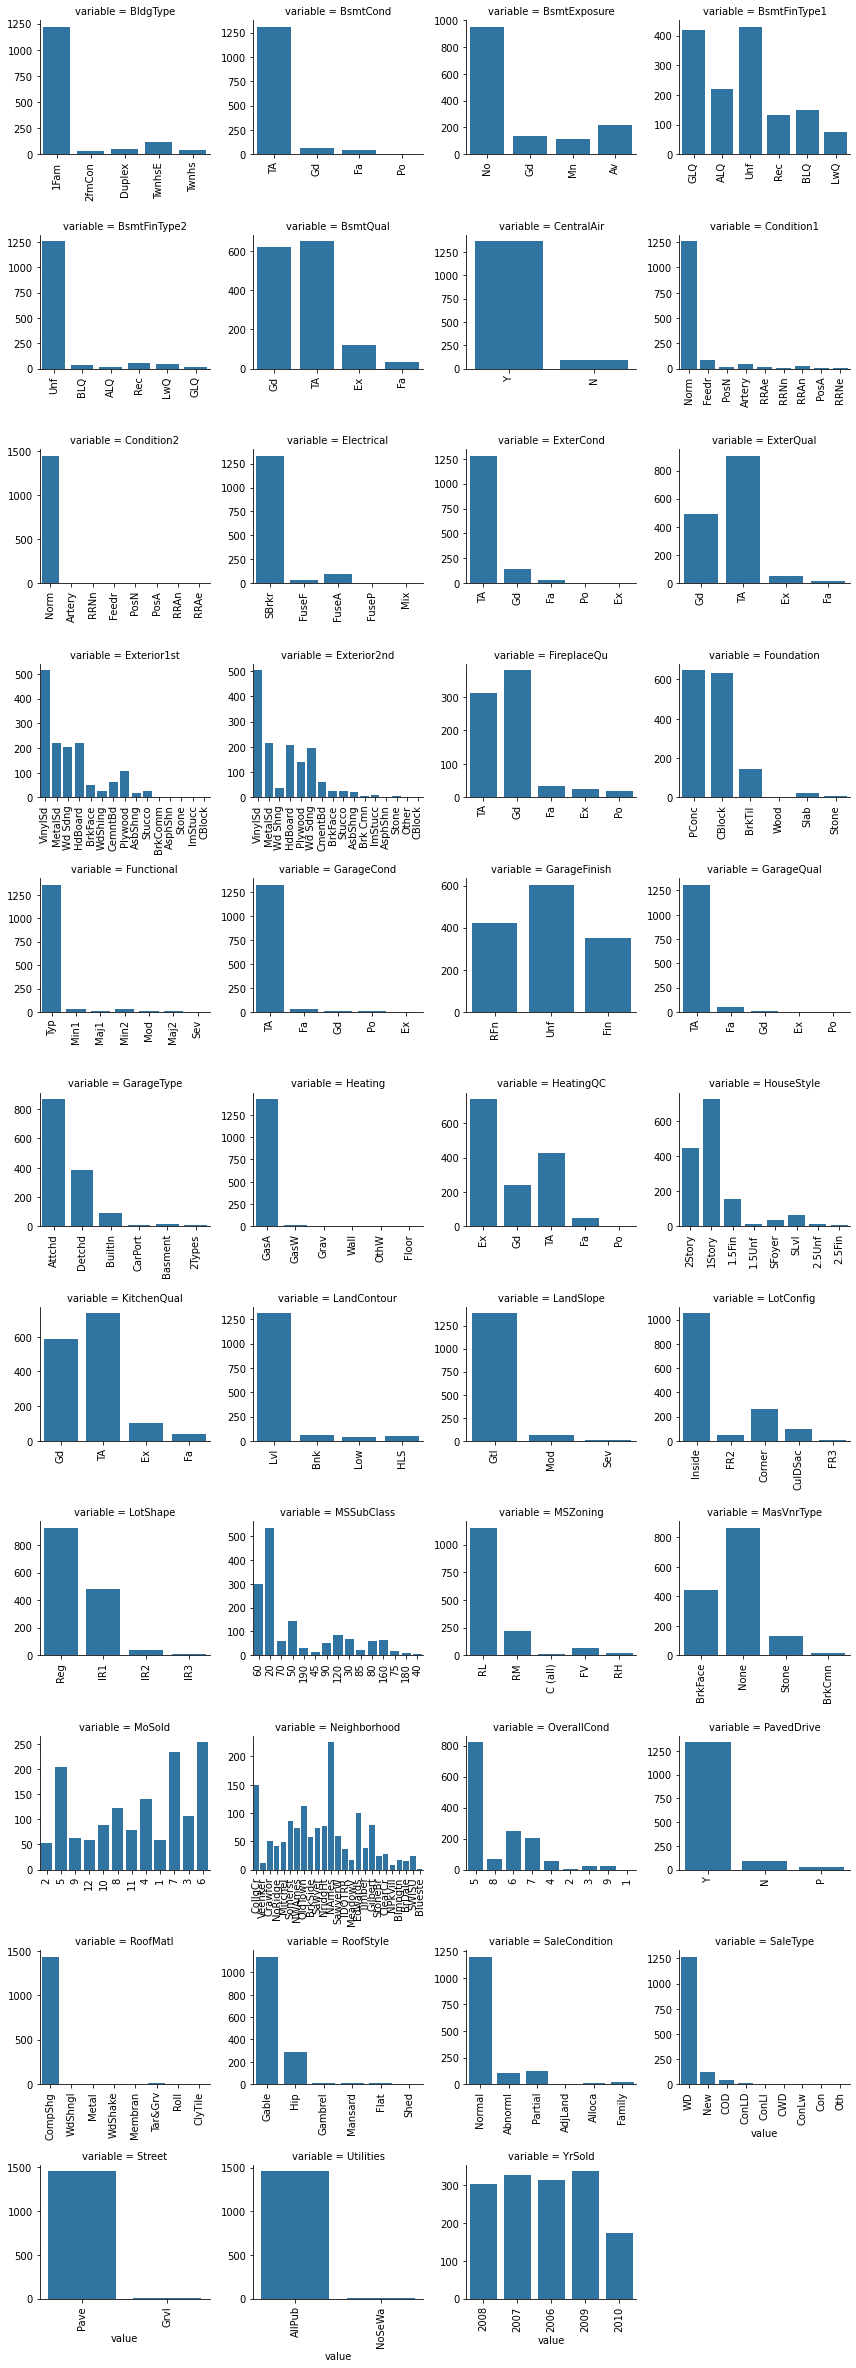

In [411]:
# Plotting for the Category Features

f = pd.melt(df_train, value_vars = sorted(cat_feat))
g = sns.FacetGrid(f,col = 'variable',col_wrap=4,sharex=False,sharey=False)
plt.xticks(rotation = 90)
g = g.map(sns.countplot,'value') 
[plt.setp(ax.get_xticklabels(),rotation = 90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

# Outliers:-

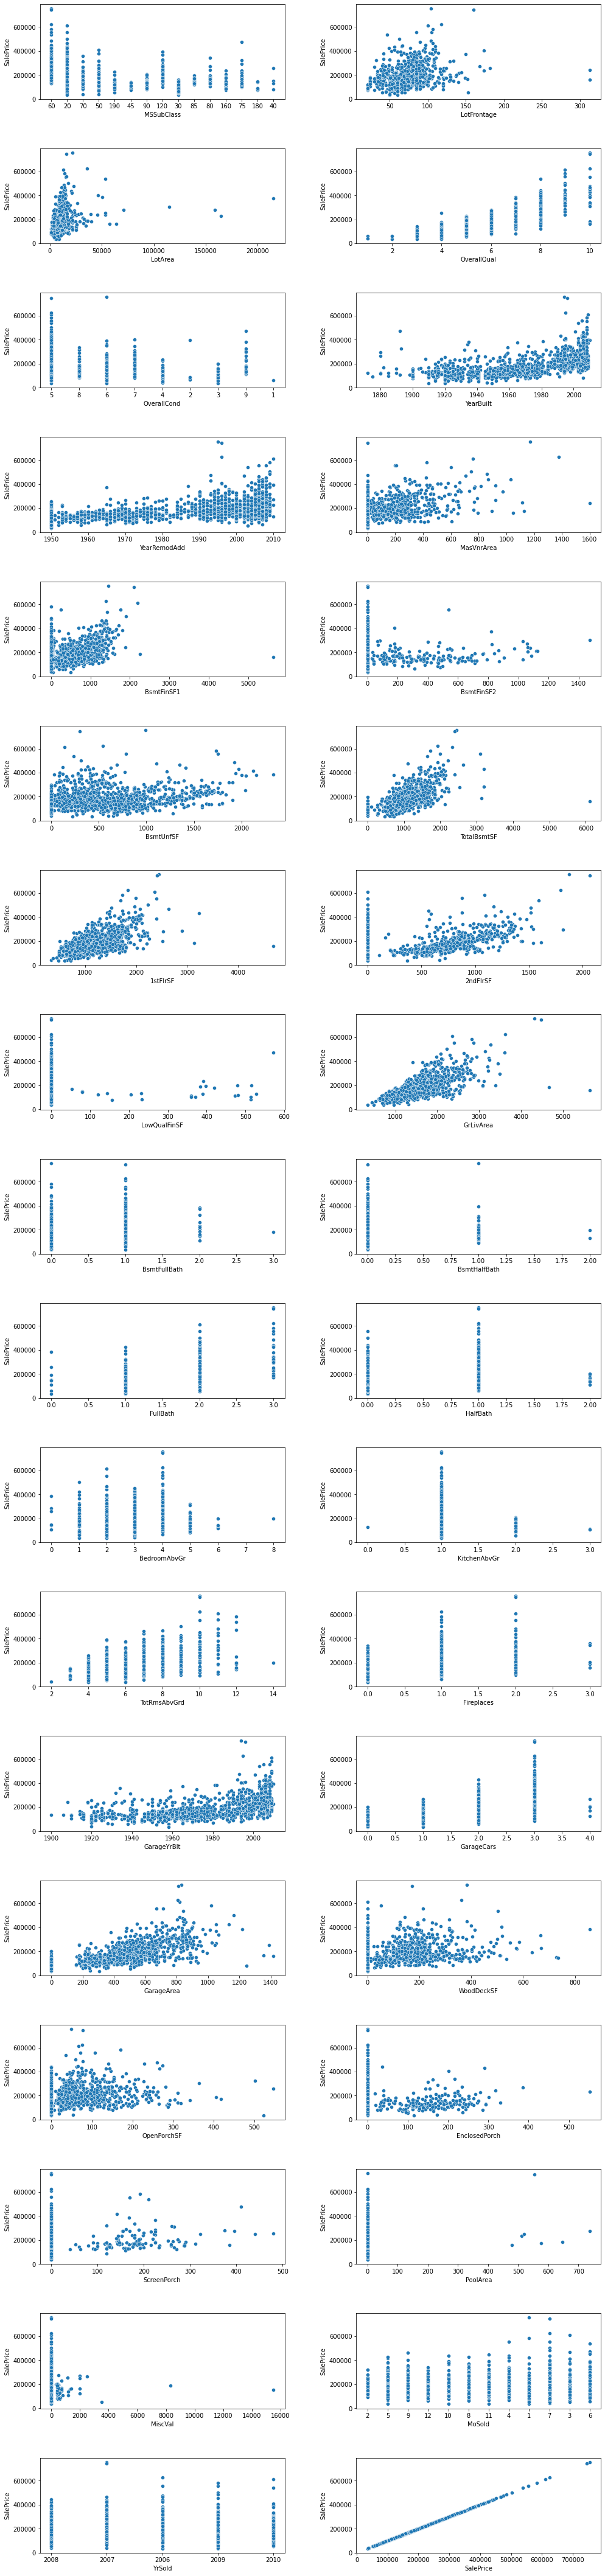

In [412]:
# checking outliers for the Numerical Features

fig,ax=plt.subplots(18,2,figsize=(15,60))
def graph(x,y,r,c,title):
    sns.scatterplot(df_train[num_feat][x],y,ax=ax[r][c])
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

for r,col in enumerate(num_feat):
    c=r%2
    graph(col,df_train['SalePrice'],r//2,c,col)

**Removing Outliers:-**

In [413]:
def outlier(df_train):
    for col in df_train.columns:
        if (((df_train[col].dtype)=='float64') | ((df_train[col].dtype)=='int64')):
            percentiles = df_train[col].quantile([0.25,0.75]).values
            df_train[col][df_train[col] <= percentiles[0]] = percentiles[0]
            df_train[col][df_train[col] >= percentiles[1]] = percentiles[1]
        else:
            df_train[col]=df_train[col]
    return df_train

df_train = outlier(df_train)

**Here,we removed outliers by having lower bound 0.25% and upper bound 0.75%.So,the values which are less than 0.25 and greater than 0.75 will be removed.**

# Handling Missing Values:-

**Now, We will handling missing values of the both data.So, whichever features has more Nan values we can fill it with 0 and other features we can fill it by taking mean() or mode() depending upon the type.**

>**Train Data:-**

In [414]:
for col in df_train.columns:
    if df_train[col].isnull().sum() > 50:
        df_train[col].fillna(0,inplace=True)
    elif df_train[col].dtypes == 'O':
        df_train[col].fillna(df_train[col].mode()[0],inplace=True)
    else:
        df_train[col].fillna(df_train[col].mean(),inplace = True)     

In [415]:
df_train.isnull().values.any()

False

>Test Data:-

In [416]:
for col in df_test.columns:
    if df_test[col].isnull().sum() > 50:
        df_test[col].fillna(0,inplace=True)
    elif df_test[col].dtypes == 'O':
        df_test[col].fillna(df_test[col].mode()[0],inplace=True)
    else:
        df_test[col].fillna(df_test[col].mean(),inplace = True)

In [417]:
df_test.isnull().values.any()

False

# Data Conversion by using LabelEncoder:-

> **Train Data:-**

In [418]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in cat_feat:
    df_train[col] = encoder.fit_transform(df_train[col].astype(str))

In [419]:
print(df_train.shape)
df_train.head()

(1460, 75)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,9,3,65.0,8450.0,1,3,3,0,4,0,5,2,2,0,5,7,4,2000,2003,1,1,12,13,1,166.0,2,4,2,2,3,3,2,706.00,5,0,223,856.00,1,0,1,4,882.0,728,0,1710.00,1,0,2,1,3,1,2,7,6,0,0,2,2002.0,2,2,548.0,5,5,2,0,61,0,0,0,0,4,2,8,4,208500
1,4,3,80.0,9600.0,1,3,3,0,2,0,24,1,2,0,2,6,7,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,712.25,5,0,284,1262.00,1,0,1,4,1262.0,0,0,1262.00,0,0,2,0,3,1,3,6,6,1,5,2,1976.0,2,2,460.0,5,5,2,168,0,0,0,0,0,7,1,8,4,181500
2,9,3,68.0,11250.0,1,0,3,0,4,0,5,2,2,0,5,7,4,2000,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.00,5,0,434,920.00,1,0,1,4,920.0,728,0,1776.75,1,0,2,1,3,1,2,6,6,1,5,2,2001.0,2,2,576.0,5,5,2,0,42,0,0,0,0,11,2,8,4,214000
3,10,3,60.0,9550.0,1,0,3,0,0,0,6,2,2,0,5,7,4,1954,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.00,5,0,540,795.75,1,2,1,4,961.0,728,0,1717.00,1,0,1,0,3,1,2,7,6,1,3,6,1998.0,3,2,576.0,5,5,2,0,35,0,0,0,0,4,0,8,0,140000
4,9,3,80.0,11601.5,1,0,3,0,2,0,15,2,2,0,5,7,4,2000,2000,1,1,12,13,1,166.0,2,4,2,2,3,0,2,655.00,5,0,490,1145.00,1,0,1,4,1145.0,728,0,1776.75,1,0,2,1,3,1,2,7,6,1,5,2,2000.0,2,2,576.0,5,5,2,168,68,0,0,0,0,3,2,8,4,214000


> **Test Data:-**

In [420]:
cat_feat_test = list(col for col in df_test.columns if df_test[col].dtypes == 'object')
print("Category Features are: ",len(cat_feat_test))

for col in cat_feat_test:
    df_test[col] = encoder.fit_transform(df_test[col].astype(str))

Category Features are:  39


In [421]:
print(df_test.shape)
df_test.head()

(1459, 74)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,0,2,1961.0,3,1.0,730.0,4,5,2,140,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,0,2,1958.0,3,1.0,312.0,4,5,2,393,36,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,5,2,1997.0,1,2.0,482.0,4,5,2,212,34,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,3,2,1998.0,1,2.0,470.0,4,5,2,360,36,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,0,2,1992.0,2,2.0,506.0,4,5,2,0,82,0,144,0,0,1,2010,8,4


# Preparing data to feed into ML Models:- 

In [422]:
X = df_train.drop(['SalePrice'],axis=1)
y = df_train['SalePrice']

# columns_x = X.columns

In [423]:
print(X.shape)
X.head()

(1460, 74)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,9,3,65.0,8450.0,1,3,3,0,4,0,5,2,2,0,5,7,4,2000,2003,1,1,12,13,1,166.0,2,4,2,2,3,3,2,706.00,5,0,223,856.00,1,0,1,4,882.0,728,0,1710.00,1,0,2,1,3,1,2,7,6,0,0,2,2002.0,2,2,548.0,5,5,2,0,61,0,0,0,0,4,2,8,4
1,4,3,80.0,9600.0,1,3,3,0,2,0,24,1,2,0,2,6,7,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,712.25,5,0,284,1262.00,1,0,1,4,1262.0,0,0,1262.00,0,0,2,0,3,1,3,6,6,1,5,2,1976.0,2,2,460.0,5,5,2,168,0,0,0,0,0,7,1,8,4
2,9,3,68.0,11250.0,1,0,3,0,4,0,5,2,2,0,5,7,4,2000,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.00,5,0,434,920.00,1,0,1,4,920.0,728,0,1776.75,1,0,2,1,3,1,2,6,6,1,5,2,2001.0,2,2,576.0,5,5,2,0,42,0,0,0,0,11,2,8,4
3,10,3,60.0,9550.0,1,0,3,0,0,0,6,2,2,0,5,7,4,1954,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.00,5,0,540,795.75,1,2,1,4,961.0,728,0,1717.00,1,0,1,0,3,1,2,7,6,1,3,6,1998.0,3,2,576.0,5,5,2,0,35,0,0,0,0,4,0,8,0
4,9,3,80.0,11601.5,1,0,3,0,2,0,15,2,2,0,5,7,4,2000,2000,1,1,12,13,1,166.0,2,4,2,2,3,0,2,655.00,5,0,490,1145.00,1,0,1,4,1145.0,728,0,1776.75,1,0,2,1,3,1,2,7,6,1,5,2,2000.0,2,2,576.0,5,5,2,168,68,0,0,0,0,3,2,8,4


In [424]:
y.head().to_frame()

,SalePrice
0,208500
1,181500
2,214000
3,140000
4,214000


# Split Data Into Train-Test:-

In [425]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)
print("y_train Shape:",y_train.shape)
print("y_test Shape:",y_test.shape)

X_train Shape: (1168, 74)
X_test Shape: (292, 74)
y_train Shape: (1168,)
y_test Shape: (292,)


# Feature Importance:-

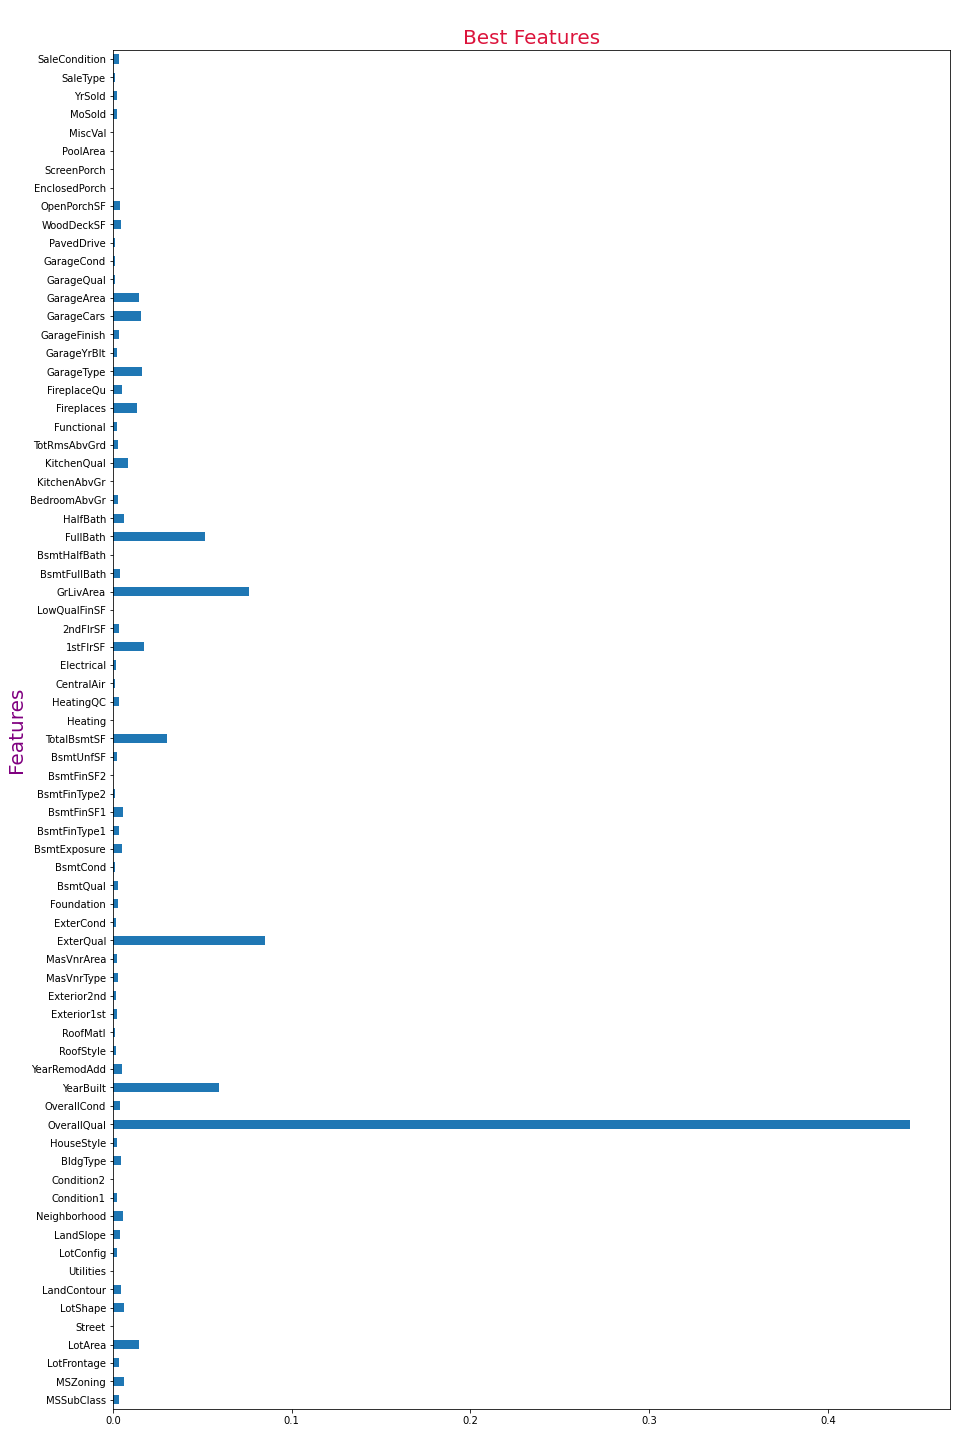

In [426]:
plt.figure(figsize = [15,25])
from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor()
extra_reg.fit(X_train,y_train)

features = pd.Series(extra_reg.feature_importances_,index= X_train.columns).plot(kind = 'barh')
plt.title("\nBest Features",size = 20,color = 'crimson')
plt.ylabel('Features',size=20,color='purple')
plt.yticks(fontsize = 10)
plt.show()

**So,as we know in terms of house selling most people look the Overall Quality first, the second thing they need to see is that Ground Living area how many sqft and how it looks followed by Exterior Quality based on these factors the price of houses would be decided.**

# Model Building:-

In [427]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=8,
                                       learning_rate=0.0385, 
                                       n_estimators=3500,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose= 0,
                                       )

lightgbm.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              feature_fraction=0.2, feature_fraction_seed=7,
              learning_rate=0.0385, max_bin=200, n_estimators=3500,
              num_leaves=8, objective='regression', verbose=0)

In [431]:
lightgbm.score(X_test,y_test)

0.9012496416304419

In [432]:
prediction = lightgbm.predict(df_test)
print(prediction)

[138063.13395758 158764.5581065  194948.83321813 ... 160207.62884932
 136484.06528826 197862.93787898]


# **Let's load submission data and make prediction on it.**

In [433]:
submission = pd.read_csv('sample_submission.csv')

In [434]:
final_output = pd.DataFrame({'Id':submission['Id'],'SalePrice' : prediction})
final_output.to_csv('HousePrice_best.csv',index = False)
final_output.head()

,Id,SalePrice
0,1461,138063.133958
1,1462,158764.558106
2,1463,194948.833218
3,1464,193187.002560
4,1465,184435.698478


# Submitted this notebook in Advanced House Price Competition of Kaggle and got rank in Top 25%.